In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylb
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.gridspec import GridSpec
%matplotlib inline
plt.style.use('/Users/arceliahermosillo/Research/stochastic/paper_labels_colors.mplstyle')

colors = {"Bdazzled Blue":"#335471","Cadet Blue":"#69a2b0","Dark purple":"#5e4085",\
"Fern Green":"#58804d","Olivine":"#a1c084","Amaranth":"#dd4053","Light Pink":"#ffa5a5",\
"light purple":"#a885c9","Brown Sugar":"#a9714b","Dark Sienna":"#49111c", "grey":"#686b6c",\
         "orange":"#d17505"}

colorarr = ['#335471','#69a2b0','#5e4085','#58804d','#a1c084','#dd4053',\
            '#ffa5a5','#a885c9','#a9714b','#49111c','#686b6c','#d17505']

In [2]:
def Rhill(ap, Mp, Mstar):
    return ap*(Mp/(3*Mstar))**(1/3)

def eH(rh, ap):
    return (rh/ap)

def Omegap(Mstar, ap):
    return (G*Mstar/ap**3)**(1/2)

def vH(rh, Omegap):
    return rh*Omegap

def Tloss(i, Rcurly, C, Clib, Mp, Mstar, m, Mcurly, eres, e, ad, ap, J3):
    Omp = Omegap(Mstar, ap)
    rh = Rhill(ap, Mp, Mstar)
    vh = vH(rh, Omp)
    eh = eH(rh, ap)
#     print(eh)
#     print(Omp)
#     print(RH)
#     print(VH)
    if i == 0:
        tloss = (Rcurly**8)*((Clib/C)**2)*((Mp**2)/(Mcurly*Mstar*m))*((eres**J3)/eh**2)*((ad/vh)**2)*Omp/yr_to_sec
    if i == 1:
        tloss = (Rcurly**4)*((Clib/C)**2)*((Mp**2)/(Mcurly*Mstar*m))*((eres**J3)/e**2)*((ad/vh)**2)*Omp/yr_to_sec
    if i == 2: 
        tloss = ((Clib/C)**2)*((Mp**2)/(Mcurly*Mstar*m))*((eres**J3)*(e*e)/((eh**4)))*((ad/vh)**2)*Omp/yr_to_sec
        # these values below are the same except off by a factor of 3. (3 times smaller) 
        # just a different way of doing order of magnitude calculation
        # following the equation from mc2006
#     if i == 0:
#         tloss = (Rcurly**8)*((Clib/C)**2)*((ad/ap)**2)*(1/(Omp*m*Mcurly))*((eres**J3)/eh)*Mp/yr_to_sec
#     if i == 1:
#         tloss = (Rcurly**4)*((Clib/C)**2)*((ad/ap)**2)*(1/(Omp*m*Mcurly))*((eres**J3)*eh/e**2)*Mp/yr_to_sec
#     if i == 2:
#         tloss = (Rcurly**4)*((Clib/C)**2)*((ad/ap)**2)*(1/(Omp*m*Mcurly))*((eres**J3)*e**2/eh**3)*Mp/yr_to_sec
    return tloss

In [3]:
mSun = 1.98e33 #grams
mEarth = 3e-6*mSun #grams
mNep = (5.15e-5)*mSun #grams
mPlut = (6.58e-9)*mSun #grams
G = 6.67e-8 # cgs
AU = 1.496e13 #cm
yr_to_sec = 3.1536e7
mPlanetesimal = mPlut

print(mEarth)
print(mNep)
print(mPlut)

5.94e+27
1.0197e+29
1.30284e+25


In [4]:
# where info is coming from 
# 3:2 pop: volk, e: volk
#11:7 pop,e: gladman
# 8:5 pop, e: gladman
#5:3 pop,e: gladman
#7:4 pop, e: gladman
#9:5 pop, e: gladman
#2:1 pop, Kat, e: 
#7:3 pop: cromvoets, e: gladman
#5:2 pop: kat, e: volk
#3:1 pop: cromvoets, e:alexandersen
#4:1 pop: cromvoets, e:alexandersen
#5:1 pop: cromvoets, e:pike 

In [5]:
# semimajor axis of the resonance 
ap_32 = 39.4; ap_117 = 40.7; ap_85 = 41.2; ap_53 = 42.3; ap_74 = 43.7; ap_95 = 44.5; 
ap_21 = 47.8; ap_73 = 53.0; ap_52 = 54.4; ap_31 = 62.5; ap_41 = 75.7; ap_51 = 87.9

# eccentricity of the resonance. values from Gladman 2012
# now for the other ones we don't have values from gladman
# so just use 0.25
e_32 = 0.175; e_117 = 0.25; e_85 = 0.25; e_53 = 0.16; e_74 = 0.12; e_95 = 0.25
e_21 = 0.275; e_73 = 0.30; e_52 = 0.4; e_31 = 0.48; e_41 = 0.57; e_51 = 0.56

res_labels=[ "3:2","11:7","8:5","5:3","7:4","9:5","2:1","7:3","5:2","3:1","4:1"]
clibs = np.array([3.64, 23.66,11.16,5.51,9.03,15.39,3.00,8.87,5.26,3.25,3.64])
orders = np.array([1, 4, 3, 2, 3, 4, 1, 4, 3, 2, 3])
eres_vals = np.array([e_32,e_117,e_85,e_53,e_74,e_95,e_21,e_73,e_52,e_31,e_41])
ap_vals = [ap_32,ap_117,ap_85,ap_53,ap_74,ap_95,ap_21,ap_73,ap_52,ap_31,ap_41]

In [6]:
# everything is same length
len(res_labels)
len(clibs)
len(eres_vals)
len(ap_vals)
len(orders)

11

In [11]:

# constant values throughout notebook


curlR = 1
curlC = 3.5
mPlanetesimal = 2*(4/3)*np.pi*(780e5)**3

ad_ = 26.6*AU
RH = Rhill(ad_,mNep,mSun)
EH = eH(RH,ad_)
EH

0.02579657159873825

Plotting Tloss for all resonances

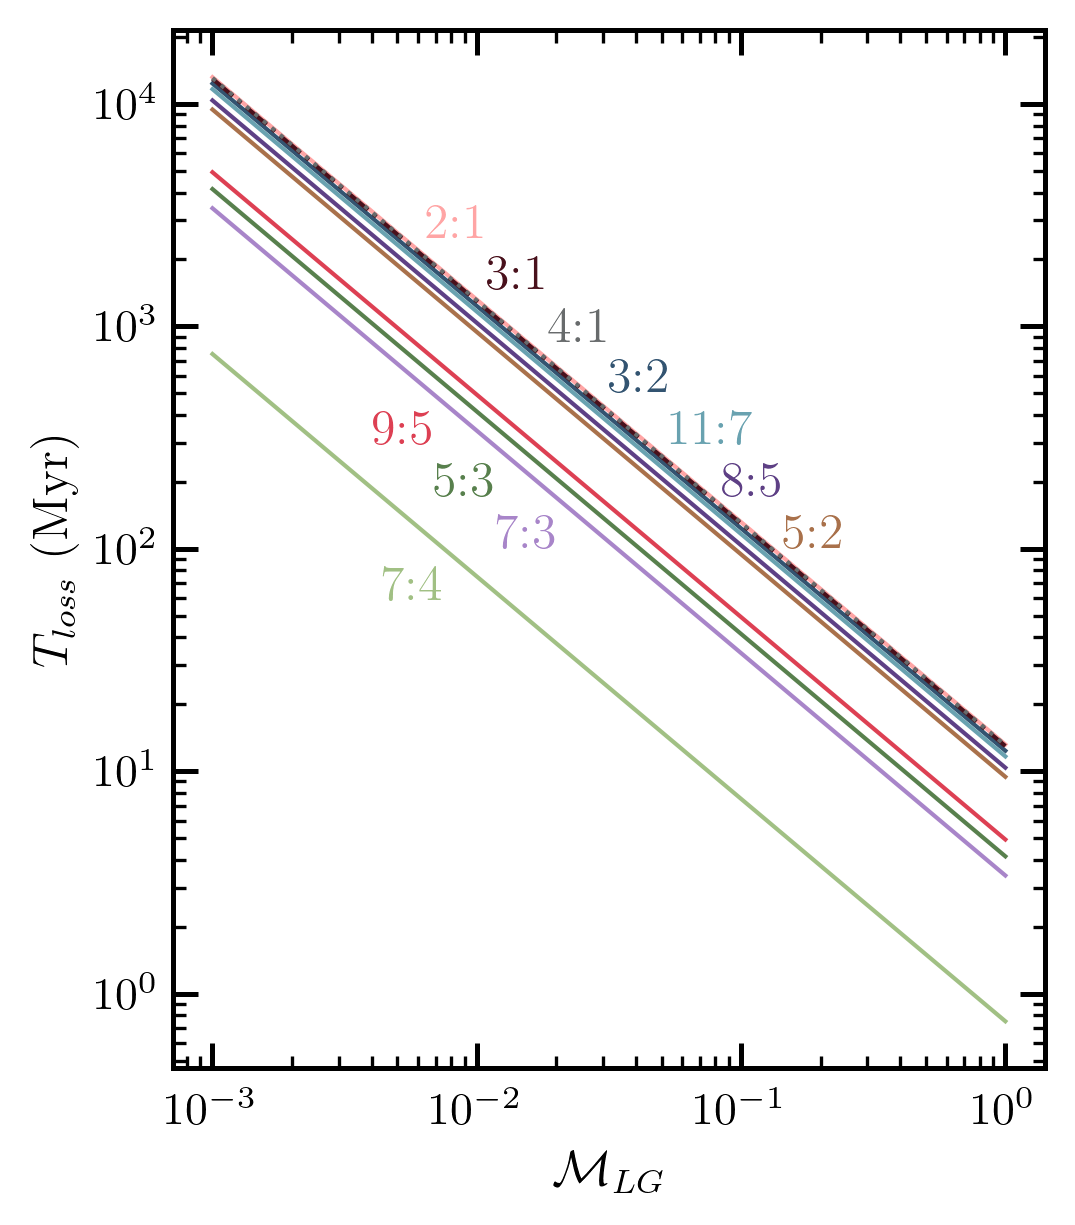

In [8]:
mcurl = np.linspace(0.001, 1, 100)
e_val = 0.01


plt.figure(figsize = (3.5, 4))
for i in range(8):
    tloss_res = Tloss(0, curlR, curlC, clibs[i], mNep, mSun, mPlanetesimal, mcurl, eres_vals[i], e_val, ad_, ad_, orders[i])/1e6
    plt.loglog(mcurl, tloss_res, '-',label = "{}".format(res_labels[i]), color = colorarr[i],linewidth=1)
for i in range(8,len(res_labels)-2):
    tloss_res = Tloss(0, curlR, curlC, clibs[i], mNep, mSun, mPlanetesimal, mcurl, eres_vals[i], e_val, ad_, ad_, orders[i])/1e6
    plt.loglog(mcurl, tloss_res, '-',label = "{}".format(res_labels[i]), color = colorarr[i],linewidth=1)
tloss_res = Tloss(0, curlR, curlC, clibs[-2], mNep, mSun, mPlanetesimal, mcurl, eres_vals[-2], e_val, ad_, ad_, orders[-2])/1e6
plt.loglog(mcurl, tloss_res, '-.',label = "{}".format(res_labels[-2]), color = colorarr[-3],linewidth=1)
tloss_res = Tloss(0, curlR, curlC, clibs[-1], mNep, mSun, mPlanetesimal, mcurl, eres_vals[-1], e_val, ad_, ad_, orders[-1])/1e6
plt.loglog(mcurl, tloss_res, ':',label = "{}".format(res_labels[-1]), color = colorarr[-2],linewidth=1)

# #this set the ticks to be on the left and bottom of the plot only
plt.tick_params(axis = 'y', which = 'minor', width = 0.8, length = 3)
plt.tick_params(axis='x', which = 'minor', width = 0.8, length = 3)
plt.xlabel("$\mathcal{M}_{LG}$",)
plt.ylabel("$T_{loss}$ (Myr)", )

order = [6, 9,10, 0, 1, 2, 8, 5, 3, 7, 4]
[ "3:2","11:7","8:5","5:3","7:4","9:5","2:1","7:3","5:2","3:1","4:1"]
plt.annotate(res_labels[order[0]], (0.29,0.8), xycoords='axes fraction', color = colorarr[order[0]])
plt.annotate(res_labels[order[1]], (0.36,0.75), xycoords='axes fraction', color = colorarr[order[1]])
plt.annotate(res_labels[order[2]], (0.43,0.7), xycoords='axes fraction', color = colorarr[order[2]])
plt.annotate(res_labels[order[3]], (0.5,0.65), xycoords='axes fraction', color = colorarr[order[3]])
plt.annotate(res_labels[order[4]], (0.57,0.6), xycoords='axes fraction', color = colorarr[order[4]])
plt.annotate(res_labels[order[5]], (0.63,0.55), xycoords='axes fraction', color = colorarr[order[5]])
plt.annotate(res_labels[order[6]], (0.7,0.5), xycoords='axes fraction', color = colorarr[order[6]])
plt.annotate(res_labels[order[7]], (0.23,0.6), xycoords='axes fraction', color = colorarr[order[7]])
plt.annotate(res_labels[order[8]], (0.3,0.55), xycoords='axes fraction', color = colorarr[order[8]])
plt.annotate(res_labels[order[9]], (0.37,0.5), xycoords='axes fraction', color = colorarr[order[9]])
plt.annotate(res_labels[order[10]], (0.24,0.45), xycoords='axes fraction', color = colorarr[order[10]])

plt.tight_layout(pad = 0.35, w_pad = 0.5)

In [9]:
def delta_ap(Clib, ap, Mp, eres, Mstar, j3):
    return 2*Clib*ap*(Mp*(eres**j3)/Mstar)**(0.5)

def delta_apT(i, C, R, m, Mp, Mstar, Mcurly, ap, ad, T, e):
    rh = Rhill(ap, Mp, Mstar)
    eh = eH(rh, ap)
    omegap = Omegap(Mstar, ap)
    vh = vH(rh, omegap)
    if i == 0:
        delap = C*(R**(-4))*((Mcurly*m/Mp)**(0.5))*(ap/ad)*eh*vh*(T/omegap)**(1/2)
    if i == 1: 
        delap = C*(R**(-2))*((Mcurly*m/Mp)**(0.5))*(ap/ad)*e*vh*(T/omegap)**(1/2)
    if i == 2:
        delap = C*((Mcurly*m/Mp)**(0.5))*(ap/ad)*(eh*eh/e)*vh*(T/omegap)**(1/2)
    return delap

def delta_ap_nc(i, m, Mp, Mstar, ap, e, R, C):
    rh = Rhill(ap, Mp, Mstar)
    x = R*rh
    if i == 0:
        delap = -C*m*Mp*(ap**6)/((Mstar**2)*x**5)
    if i == 1:
        delap = C*m*(ap**4)*e/(Mstar*x**3)
    return delap

def max_delta_ap_c(i, m, Mp, Mstar, ap, a, e, C, b):
    if i == 0:
        delap = C*m*ap*e/Mp
    if i == 1:
        omega = Omegap(Mstar, a)
        delap = C*G*m/(b*a*e*omega**2)
    return delap


def encrate(i, m,Mp, Mstar, Mcurly, a, ap, ad,R,e):
    rh = Rhill(ap, Mp, Mstar)
    omegap = Omegap(Mstar, ap)
    vh = vH(rh, omegap) 
    u = e*omegap*a
    x = R*rh
    Sig_m = Mcurly*Mp/(2*np.pi*ad**2)   # equation 6
    if i ==0: #low e
        Ndot = (Sig_m/m)*omegap*x*x 
    if i==1: #high e
        Ndot = (Sig_m/m)*(omegap/u)*((G*Mp/u**2)**2)*u
    return Ndot


def Diffusion_micro(i, C, C1, m , Mp, Mstar, Mcurly, a, ap, ad, R, T, e):
    rh = Rhill(ap, Mp, Mstar)
    x = R*rh
    if i == 0: # low eccentricity 
        delap = delta_ap_nc(0, m, Mp, Mstar, ap, e, R, C1) # equation 14a
        Ndot = encrate(i, m,Mp, Mstar, Mcurly, a, ap, ad,R,e)
        C2 = ((C/C1)**2)*(2*np.pi/81)
    if i ==1: #high eccentricity
        delap = max_delta_ap_c(0, m, Mp, Mstar, ap, a, e, C1, 0)
        Ndot = encrate(i, m,Mp, Mstar, Mcurly, a, ap, ad,R,e)
        C2 = ((C/C1)**2)*(2*np.pi/9)
    return ((delap)**2)*C2*Ndot

def Diffusion(i,C,R,m,Mp,Mstar,Mcurly,ap,ad,T,e):
    delap = delta_apT(i,C,R,m,Mp,Mstar,Mcurly,ap,ad,T,e)
    return (delap**2)/(T)

def lam_n(i, n, C, C1, Clib, a, ap, ad, m, Mp, Mstar, Mcurly, e, eres, R, T, j3):
    delap = delta_ap(Clib, ap, Mp, eres, Mstar, j3)
    D = Diffusion(i,C,R,m,Mp,Mstar,Mcurly,ap,ad,T,e)   
    return ((n*np.pi)**2)*D/(2*delap**2)

def Pkeep(i, C, C1, Clib, a, ap, ad, m, Mp, Mstar, Mcurly, e, eres, R, T, j3):
    p_keep = 0
    for n in range(1,1000): 

        lamn = lam_n(i, n, C, C1, Clib, a, ap, ad, m, Mp, Mstar, Mcurly, e, eres, R, T, j3)
        
        prob = ((4/(n*np.pi))*(np.sin(n*np.pi/2))**3)*np.exp(-T*lamn)

        p_keep += prob
       
    return p_keep

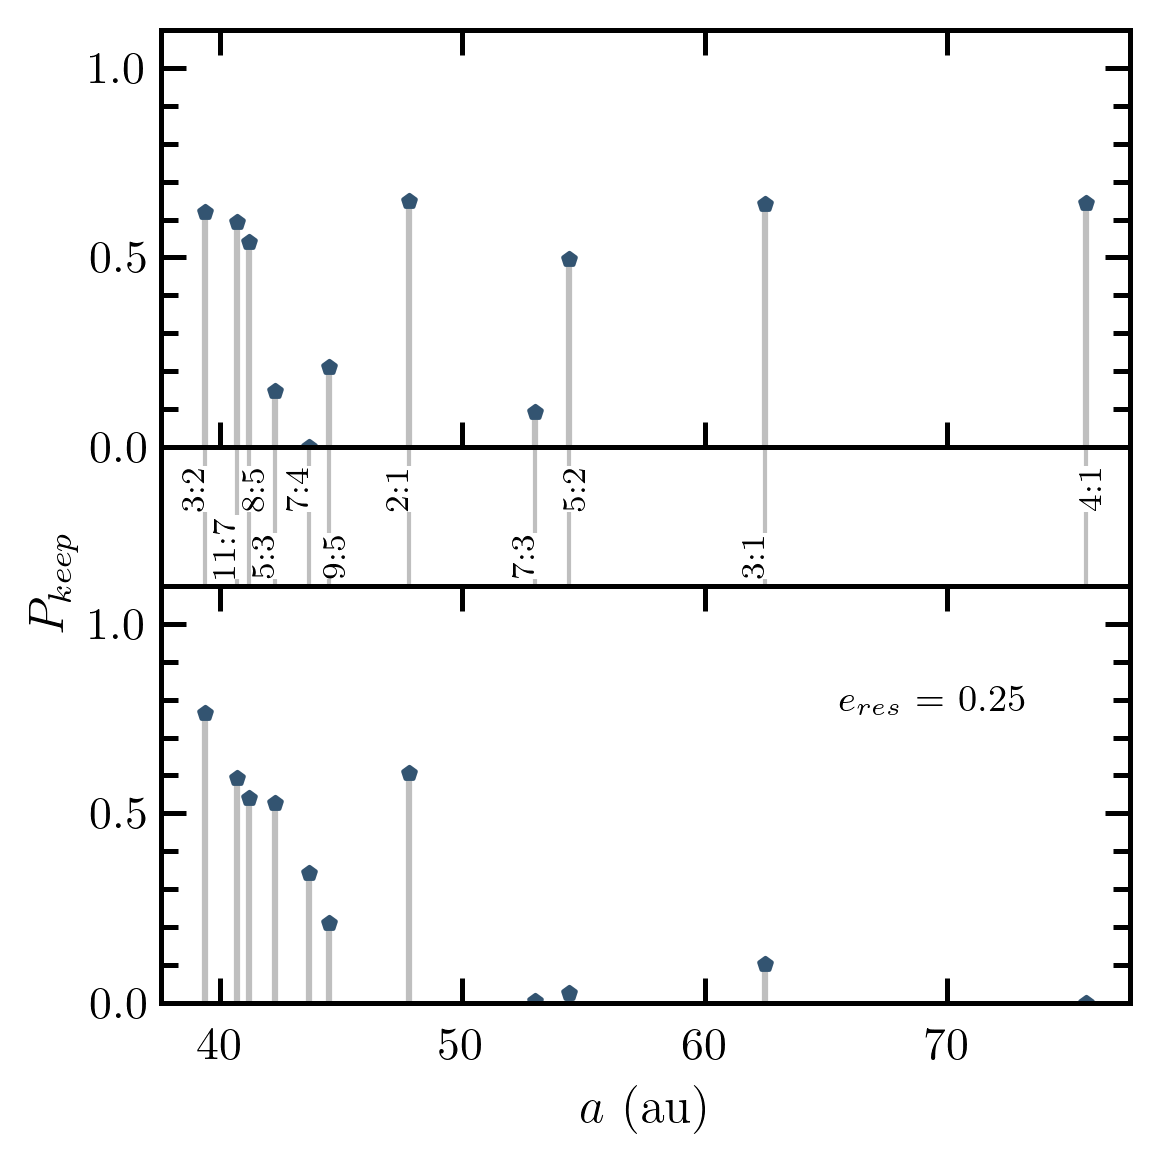

In [12]:
# this is for the low eccentricity case 
### REMEMBER DEPENDING ON ECCENTRICITY PKEEP CHANGES
## i = 0 if e < 0.025 case a for equation delta_apT, 
## i = 2 if e > 0.025 case c for equation delta_apT
## i = 1 would be for case b with e = EH

# plotting case b, e = EH
e_val = EH
curlC1=2.5

fig = plt.figure(figsize=(3.8,3.8))
# fig.suptitle("Controlling spacing around and between subplots")

gs1 = GridSpec(3, 1, height_ratios=[3,1,3],hspace=0)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
ax3 = fig.add_subplot(gs1[2])
ax2.tick_params(labelbottom=False, labelleft=False,labeltop=False,labelright=False)
ax2.set_xticks([])
### REMEMBER DEPENDING ON ECCENTRICITY PKEEP CHANGES A LOT
## i = 0 if e < 0.025 , i = 1 if e > 0.025

pkeep0 = []
mcurl0 = 0.078
T0 = 50e6*yr_to_sec


pkeep1 = []
mcurl1 = 0.078
T1 =50e6*yr_to_sec

pkeep2 = []
mcurl2 = 0.22
T2 =10e6*yr_to_sec

pkeep3 = []
mcurl3 = 0.22
T3 = 10e6*yr_to_sec

for i in range(len(eres_vals)):
    pk = Pkeep(1,curlC, curlC1, clibs[i], ad_, ad_, ad_, mPlanetesimal, mNep, mSun, mcurl0, e_val, eres_vals[i], curlR, T0, orders[i])
    pkeep0.append(pk)

for i in range(len(eres_vals)):
    pk = Pkeep(1,curlC, curlC1, clibs[i], ad_, ad_, ad_, mPlanetesimal, mNep, mSun, mcurl1, e_val, 0.25, curlR, T1, orders[i])
    pkeep1.append(pk)

for i in range(len(eres_vals)):
    pk = Pkeep(1,curlC, curlC1, clibs[i], ad_, ad_, ad_, mPlut, mNep, mSun, mcurl2, e_val, eres_vals[i], curlR, T2, orders[i])
    pkeep2.append(pk)
    
for i in range(len(eres_vals)):
    pk = Pkeep(1,curlC, curlC1, clibs[i], ad_, ad_, ad_, mPlut, mNep, mSun, mcurl3, e_val, 0.25, curlR, T3, orders[i])
    pkeep3.append(pk)

xoffset = [-1,-1,-0.3,-1,-1,-0.3,-1,-1,-0.3,-1,-0.3]
y = [0.58,0.1,0.58,0.1,0.58,0.1,0.58,0.1,0.58,0.1,0.58]
for rl, xp, i in zip(res_labels, ap_vals, range(len(res_labels))):
    ax2.vlines(xp, 0, 1.1, color = 'grey', alpha = 0.5, linewidth = 1)
    ax2.text(xp+xoffset[i],y[i], rl,fontsize=8,rotation='vertical', bbox=dict(boxstyle='square,pad=0.01', fc='white', ec='none'))
     
ax1.vlines(ap_vals, np.zeros(len(pkeep0)), pkeep2, color = 'grey', zorder = -1, alpha = 0.5)
ax3.vlines(ap_vals, np.zeros(len(pkeep1)), pkeep3, color = 'grey', zorder = -1, alpha = 0.5)
ax3.annotate( "$e_{res}$ = 0.25",(0.7,0.7), xycoords = 'axes fraction',fontsize = 9)
ax3.scatter(ap_vals, pkeep3, marker ='p', label = f"$\mathcal{'{M}'}_{'{PL}'}$={mcurl3}\n$T$ = {T3/1e6/yr_to_sec}MA", s = 10)
ax1.scatter(ap_vals, pkeep2, marker = 'p', label = f"$\mathcal{'{M}'}_{'{PL}'}$ = {mcurl2}\n$T$ = {T2/1e6/yr_to_sec}MA", s = 10)
ax3.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.set_ylim(0,1.1)
ax3.set_ylim(0,1.1)
ax2.set_ylim(0,1)
ax3.set_xlabel("$a$ (au)",)
fig.supylabel("$P_{{keep}}$",)
plt.tight_layout(pad=0.35, w_pad=0.5)
plt.show()

### let's try to normalize population for two scenarios...

In [13]:
res_pop=[ "3:2", "5:3", "7:4", "2:1", "7:3", "5:2", "3:1","4:1"]
ap_pop = np.array([ap_32, ap_53, ap_74, ap_21, ap_73, ap_52, ap_31,ap_41])
pop = np.array([1,0.5,0.3,0.4,0.3,0.85,1.7,1.3])
lerr = [0.3,0.3,0.2,0.2,0.23,0.47,0.8,0.8]
uerr = [0.36,0.52,0.4,0.25,0.5,.75,1.1,1.5]
pkeep_pop = np.delete(np.array(pkeep2),[1,2,5])

In [14]:
delapclib = []
for i in range(len(eres_vals)):
    dap = delta_ap(clibs[i], ap_vals[i], mNep, eres_vals[i], mSun, orders[i])
    delapclib.append(dap)
delapclib = np.array(delapclib)

delapclib_pop = np.delete(delapclib,[1,2,5])

#### random walk scenraio, N(a) propto a

In [15]:
pop_res_13 = pop[0]*(ap_pop/ap_pop[0])*pkeep_pop/pkeep_pop[0]

#### scattering scenario, N(a) propto a^3.5 or a^2 normalized to 5:2 and 3:2 pop

In [16]:
popres5235 = pop[5]*((ap_pop/ap_pop[5])**(3.5))*(delapclib_pop/ap_pop)*((delapclib_pop[5]/ap_pop[5])**-1)*pkeep_pop/pkeep_pop[5]
popres = pop[0]*((ap_pop/ap_pop[0])**(2))*(delapclib_pop/ap_pop)*((delapclib_pop[0]/ap_pop[0])**-1)*pkeep_pop/pkeep_pop[0]

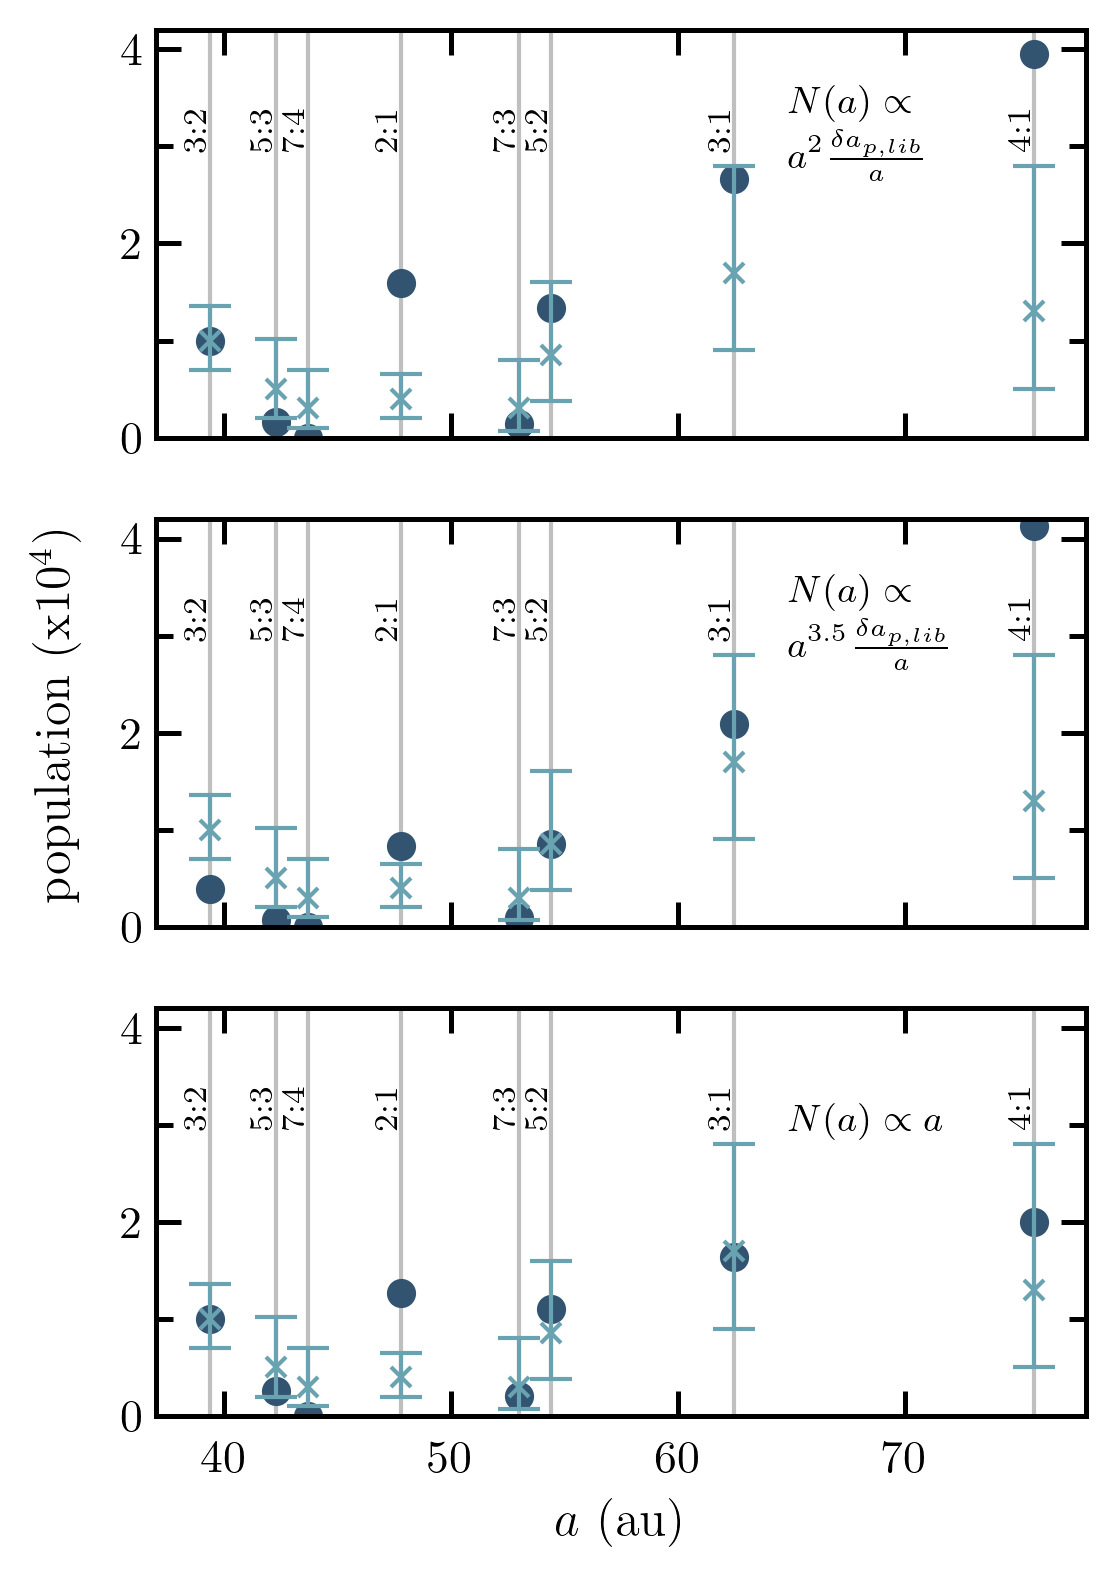

In [17]:
fig, axs = plt.subplots(3,1,figsize = (4,6),sharex=True,sharey=True)
for i,xp in enumerate(ap_pop):
    axs[2].vlines(xp, 0, 4.2, color = 'grey', alpha = 0.5, linewidth = 1)
    axs[2].text(xp-1.2, 3, res_pop[i], fontsize=8,rotation='vertical')
    axs[0].vlines(xp, 0, 4.2, color = 'grey', alpha = 0.5, linewidth = 1)
    axs[0].text(xp-1.2, 3, res_pop[i], fontsize=8,rotation='vertical')
    axs[1].vlines(xp, 0, 4.2, color = 'grey', alpha = 0.5, linewidth = 1)
    axs[1].text(xp-1.2, 3, res_pop[i], fontsize=8,rotation='vertical')
axs[1].plot(ap_pop,popres5235,'o')
axs[1].errorbar(ap_pop,pop,yerr=[lerr,uerr],fmt='x',linewidth=1,markersize=5,capsize=5)
axs[0].plot(ap_pop,popres,'o')
axs[0].errorbar(ap_pop,pop,yerr=[lerr,uerr],fmt='x',linewidth=1,markersize=5,capsize=5)
axs[2].plot(ap_pop,pop_res_13,'o')
axs[2].errorbar(ap_pop,pop,yerr=[lerr,uerr],fmt='x',linewidth=1,markersize=5,capsize=5)

axs[1].annotate( "$N(a) \propto$\n$a^{3.5} \\frac{\delta a_{p,lib}}{a}$",(0.68,0.66),
                xycoords = 'axes fraction',fontsize =9)
axs[0].annotate( "$N(a) \propto$\n$a^{2} \\frac{\delta a_{p,lib}}{a}$",(0.68,0.66), 
                xycoords = 'axes fraction',fontsize = 9)
axs[2].annotate( "$N(a) \propto a$",(0.68,0.7), xycoords = 'axes fraction',fontsize = 9)
axs[2].set_xlabel("$a$ (au)")
fig.supylabel("population (x$10^4$)")


axs[0].set_ylim(0,4.2)
axs[0].set_xlim(37,78)

axs[0].yaxis.set_minor_locator(AutoMinorLocator(2))
axs[1].yaxis.set_minor_locator(AutoMinorLocator(2))

In [ ]:
mcurl = np.linspace(0.01,0.3,500)
time = np.ones(len(mcurl))*10e6*yr_to_sec
e_val=EH
mgrid,Tgrid = np.meshgrid(mcurl,time)
pkeepgridT10e6 = []
for i in range(len(eres_vals)):
    pk = Pkeep(1,curlC, curlC1, clibs[i], ad_, ad_, ad_, mPlanetesimal, mNep, mSun, mgrid, e_val, eres_vals[i], curlR, Tgrid, orders[i])
    pkeepgridT10e6.append(np.array(pk))
    


In [ ]:

time = np.ones(len(mcurl))*50e6*yr_to_sec
mgrid,Tgrid = np.meshgrid(mcurl,time)
pkeepgridT50e6 = []
for i in range(len(eres_vals)):
    pk = Pkeep(1,curlC, curlC1, clibs[i], ad_, ad_, ad_, mPlanetesimal, mNep, mSun, mgrid, e_val, eres_vals[i], curlR, Tgrid, orders[i])
    pkeepgridT50e6.append(np.array(pk))
    


In [ ]:
def gradient_image(ax, Z, **kwargs):
    """
    Draw a gradient image based on a colormap.

    Parameters
    ----------
    ax : Axes
        The axes to draw on.
    direction : float
        The direction of the gradient. This is a number in
        range 0 (=vertical) to 1 (=horizontal).
    cmap_range : float, float
        The fraction (cmin, cmax) of the colormap that should be
        used for the gradient, where the complete colormap is (0, 1).
    **kwargs
        Other parameters are passed on to `.Axes.imshow()`.
        In particular, *cmap*, *extent*, and *transform* may be useful.
    """

    im = ax.imshow(Z.T, interpolation='bicubic',clim=(0,1),cmap="Greens",
                   aspect='auto', origin="lower",**kwargs)
    return im


def gradient_bar(ax, x, y, Z, width=0.5, bottom=0):
    i = 0
    for left, top in zip(x, y):
        left = left - width/2
        right = left + width
        im = gradient_image(ax, Z[i], extent=(left, right, bottom, top))
        i+=1
    return im


fig = plt.figure(figsize=(3.8,3.8))

gs1 = GridSpec(3, 1, height_ratios=[3,1,3],hspace=0)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
ax3 = fig.add_subplot(gs1[2])
ax2.tick_params(labelbottom=False, labelleft=False,labeltop=False,labelright=False)
ax2.set_xticks([])
ax1.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax3.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

xoffset = [-1,-1,-0.3,-1,-1,-0.3,-1,-1,-0.3,-1,-0.3]
y = [0.58,0.1,0.58,0.1,0.58,0.1,0.58,0.1,0.58,0.1,0.58]
for rl, xp, i in zip(res_labels, ap_vals, range(len(res_labels))):
    ax2.vlines(xp, 0, 1.1, color = 'grey', alpha = 0.5, linewidth = 1)
    ax2.text(xp+xoffset[i],y[i], rl,fontsize=8,rotation='vertical', bbox=dict(boxstyle='square,pad=0.01', fc='white', ec='none'))

        

ax1.set(xlim=(ap_vals[0]-2, ap_vals[-1]+2), ylim=(0.01, 0.3))
ax2.set(xlim=(ap_vals[0]-2, ap_vals[-1]+2), ylim=(0, 1))
ax3.set(xlim=(ap_vals[0]-2, ap_vals[-1]+2), ylim=(0.01, 0.3))
y = np.ones(len(ap_vals))*0.3
cbar0 = gradient_bar(ax1, ap_vals, y,pkeepgridT10e6, width=0.7)
cbar1 = gradient_bar(ax3, ap_vals, y,pkeepgridT50e6, width=0.7)

ax3.set_xlabel("$a$ (au)",)
ax1.annotate("$T$ = 10 MA",(63,0.2),fontsize=9)
ax3.annotate("$T$ = 50 MA",(63,0.2),fontsize=9)
fig.supylabel("$\mathcal{M}_{LG}$",)
cbar = fig.colorbar(cbar0,ax=[ax1,ax2,ax3],location="right",ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
cbar.set_label("$P_{keep}$")
plt.show()